In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='roberta-large'

# the commands below didn't work inside for loop and got CUDA out of memory Error.
#     with torch.no_grad():
#        torch.cuda.empty_cache()
#    del data, model, trainer, acc, f1
# Instead of running these commands in a loop, execute them cell by cell, restarting between them.
# Each cell will print its results. To keep the results and avoid re-running specific cells, skip them intermittently on each run.

In [3]:
results = {'acc':[],
           'f1':[],
           'g':[]}

In [4]:
lr = 5.0e-5
g = 2

print(f'Grid search {model_checkpoint}, lr: {lr} ,focal loss, gamma: {g}')
data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,batch_size=16)
data.setup_dataloaders()
model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
trainer = Engine(epochs=30,labels=data.labels)
trainer.model = model.model
trainer.dataset_encoded = data.dataset_encoded
acc, f1 = trainer.run(lr=lr,
                        wd=0.0,
                        train_dataloader=data.train_dataloader,
                        eval_dataloader=data.eval_dataloader,
                        test_dataloader=data.test_dataloader,
                        focalloss=True,
                        early_stop=3,
                        accumulation_steps=2,
                        gamma=g)
results['acc'].append(acc)
results['f1'].append(f1)
results['g'].append(g)
print('### '*10)
print(results)
print('### '*10)

Grid search roberta-large, lr: 5e-05 ,focal loss, gamma: 2


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	7.9668	Val Loss:	2.2389	Accuracy:	0.0414	F1:	0.0088
2 / 30: Train Loss:	7.8489	Val Loss:	2.2006	Accuracy:	0.0355	F1:	0.0076
3 / 30: Train Loss:	7.7278	Val Loss:	2.2492	Accuracy:	0.0355	F1:	0.0076
4 / 30: Train Loss:	8.0469	Val Loss:	2.2086	Accuracy:	0.0355	F1:	0.0076
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.00      0.00      0.00        67
               anecdote       0.00      0.00      0.00        43
         cherry picking       0.00      0.00      0.00        56
      conspiracy theory       0.00      0.00      0.00        39
           fake experts       0.04      1.00      0.07        12
           false choice       0.00      0.00      0.00        13
      false equivalence       0.00      0.00      0.00        14
impossible expectations       0.00      0.00      0.00        37
           single cause       0.00    

In [4]:
lr = 5.0e-5
g = 4

print(f'Grid search {model_checkpoint}, lr: {lr} ,focal loss, gamma: {g}')
data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,batch_size=16)
data.setup_dataloaders()
model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
trainer = Engine(epochs=30,labels=data.labels)
trainer.model = model.model
trainer.dataset_encoded = data.dataset_encoded
acc, f1 = trainer.run(lr=lr,
                        wd=0.0,
                        train_dataloader=data.train_dataloader,
                        eval_dataloader=data.eval_dataloader,
                        test_dataloader=data.test_dataloader,
                        focalloss=True,
                        early_stop=3,
                        accumulation_steps=2,
                        gamma=g)
results['acc'].append(acc)
results['f1'].append(f1)
results['g'].append(g)
print('### '*10)
print(results)
print('### '*10)

Grid search roberta-large, lr: 5e-05 ,focal loss, gamma: 4


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	4.9338	Val Loss:	1.4958	Accuracy:	0.4586	F1:	0.3883
2 / 30: Train Loss:	2.3976	Val Loss:	1.3185	Accuracy:	0.5059	F1:	0.4763
3 / 30: Train Loss:	1.5459	Val Loss:	0.9801	Accuracy:	0.7101	F1:	0.6815
4 / 30: Train Loss:	0.7714	Val Loss:	1.0118	Accuracy:	0.6213	F1:	0.6049
5 / 30: Train Loss:	0.3490	Val Loss:	0.7490	Accuracy:	0.7426	F1:	0.7331
6 / 30: Train Loss:	0.3082	Val Loss:	0.9335	Accuracy:	0.7337	F1:	0.7205
7 / 30: Train Loss:	0.1768	Val Loss:	0.7992	Accuracy:	0.7396	F1:	0.7371
8 / 30: Train Loss:	0.0629	Val Loss:	0.7906	Accuracy:	0.7308	F1:	0.7230
9 / 30: Train Loss:	0.0591	Val Loss:	0.7376	Accuracy:	0.7633	F1:	0.7524
10 / 30: Train Loss:	0.0138	Val Loss:	0.7181	Accuracy:	0.7663	F1:	0.7502
11 / 30: Train Loss:	0.0110	Val Loss:	0.6948	Accuracy:	0.7959	F1:	0.7648
12 / 30: Train Loss:	0.0245	Val Loss:	0.7334	Accuracy:	0.7574	F1:	0.7323
13 / 30: Train Loss:	0.0119	Val Loss:	0.6968	Accuracy:	0.7811	F1:	0.7509
14 / 30: Train Loss:	0.0042	Val Loss:	0.7028	Accuracy:	0.781

In [4]:
lr = 5.0e-5
g = 8

print(f'Grid search {model_checkpoint}, lr: {lr} ,focal loss, gamma: {g}')
data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,batch_size=16)
data.setup_dataloaders()
model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
trainer = Engine(epochs=30,labels=data.labels)
trainer.model = model.model
trainer.dataset_encoded = data.dataset_encoded
acc, f1 = trainer.run(lr=lr,
                        wd=0.0,
                        train_dataloader=data.train_dataloader,
                        eval_dataloader=data.eval_dataloader,
                        test_dataloader=data.test_dataloader,
                        focalloss=True,
                        early_stop=3,
                        accumulation_steps=2,
                        gamma=g)
results['acc'].append(acc)
results['f1'].append(f1)
results['g'].append(g)
print('### '*10)
print(results)
print('### '*10)

Grid search roberta-large, lr: 5e-05 ,focal loss, gamma: 8


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	3.5759	Val Loss:	1.9962	Accuracy:	0.2160	F1:	0.1366
2 / 30: Train Loss:	2.5219	Val Loss:	1.5231	Accuracy:	0.5118	F1:	0.4796
3 / 30: Train Loss:	1.1590	Val Loss:	1.2386	Accuracy:	0.5976	F1:	0.5771
4 / 30: Train Loss:	0.6043	Val Loss:	1.2250	Accuracy:	0.5680	F1:	0.5386
5 / 30: Train Loss:	0.5701	Val Loss:	1.2020	Accuracy:	0.6213	F1:	0.5759
6 / 30: Train Loss:	0.4711	Val Loss:	1.0907	Accuracy:	0.6686	F1:	0.6449
7 / 30: Train Loss:	0.1407	Val Loss:	0.9496	Accuracy:	0.7041	F1:	0.6731
8 / 30: Train Loss:	0.0475	Val Loss:	0.9107	Accuracy:	0.6923	F1:	0.6597
9 / 30: Train Loss:	0.0245	Val Loss:	0.8962	Accuracy:	0.6953	F1:	0.6693
10 / 30: Train Loss:	0.0124	Val Loss:	0.9172	Accuracy:	0.7101	F1:	0.6841
11 / 30: Train Loss:	0.0065	Val Loss:	0.8875	Accuracy:	0.7249	F1:	0.6916
12 / 30: Train Loss:	0.0878	Val Loss:	1.1018	Accuracy:	0.6479	F1:	0.6595
13 / 30: Train Loss:	0.1446	Val Loss:	1.0995	Accuracy:	0.6272	F1:	0.6034
14 / 30: Train Loss:	0.0764	Val Loss:	0.9932	Accuracy:	0.674

In [4]:
lr = 5.0e-5
g = 16

print(f'Grid search {model_checkpoint}, lr: {lr} ,focal loss, gamma: {g}')
data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,batch_size=16)
data.setup_dataloaders()
model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
trainer = Engine(epochs=30,labels=data.labels)
trainer.model = model.model
trainer.dataset_encoded = data.dataset_encoded
acc, f1 = trainer.run(lr=lr,
                        wd=0.0,
                        train_dataloader=data.train_dataloader,
                        eval_dataloader=data.eval_dataloader,
                        test_dataloader=data.test_dataloader,
                        focalloss=True,
                        early_stop=3,
                        accumulation_steps=2,
                        gamma=g)
results['acc'].append(acc)
results['f1'].append(f1)
results['g'].append(g)
print('### '*10)
print(results)
print('### '*10)

Grid search roberta-large, lr: 5e-05 ,focal loss, gamma: 16


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	1.2556	Val Loss:	1.6822	Accuracy:	0.3550	F1:	0.3342
2 / 30: Train Loss:	0.6387	Val Loss:	1.5973	Accuracy:	0.5089	F1:	0.4759
3 / 30: Train Loss:	0.2574	Val Loss:	1.3333	Accuracy:	0.6657	F1:	0.6232
4 / 30: Train Loss:	0.1310	Val Loss:	1.4455	Accuracy:	0.4290	F1:	0.4064
5 / 30: Train Loss:	0.2972	Val Loss:	1.4242	Accuracy:	0.5414	F1:	0.5012
6 / 30: Train Loss:	0.1751	Val Loss:	1.2359	Accuracy:	0.6331	F1:	0.6072
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.70      0.34      0.46        67
               anecdote       0.84      0.86      0.85        43
         cherry picking       0.63      0.68      0.66        56
      conspiracy theory       0.55      0.92      0.69        39
           fake experts       0.42      0.83      0.56        12
           false choice       0.69      0.85      0.76        13
      false equivalence 

In [5]:
from collections import defaultdict 

a = {'acc': [0.037037037037037035], 'f1': [0.007936507936507936], 'g': [2]}
b = {'acc': [0.798941798941799], 'f1': [0.758187465159965], 'g': [4]}
c = {'acc': [0.671957671957672], 'f1': [0.6417148904471863], 'g': [8]}
d = {'acc': [0.6666666666666666], 'f1': [0.645490783541631], 'g': [16]}

results = defaultdict(list)
for d in (a,b,c,d):
    for k,v in d.items():
        results[k].append(v[0])

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

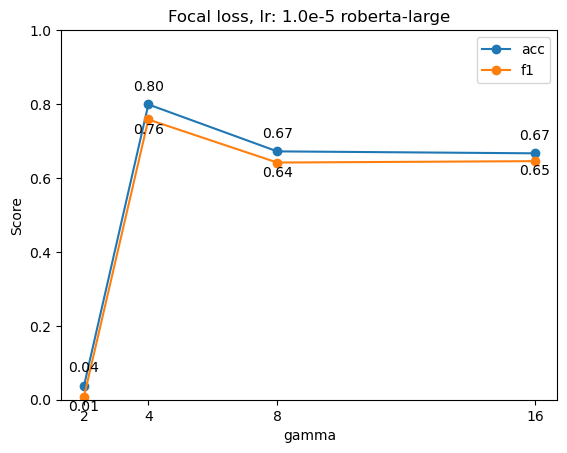

In [7]:
def plot_grid_search(df, title):

    # Create the plot
    ax = df.plot(x='g', y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row["g"], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row["g"], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df['g'], [val for val in df['g']], ha='center')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('gamma')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Focal loss, lr: 1.0e-5 {model_checkpoint}')